In [77]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics.classification import accuracy_score, log_loss
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./results/week3.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df[13:]
df.head(20)

Date  Close Price  Open Price  High Price  Low Price  \
13  2019-10-07      1732.66     1731.63     1747.83    1723.70   
14  2019-10-04      1739.65     1726.02     1740.58    1719.23   
15  2019-10-03      1724.42     1713.00     1725.00    1685.06   
16  2019-10-02      1713.23     1727.74     1728.89    1705.00   
17  2019-10-01      1735.65     1746.00     1755.60    1728.41   
18  2019-09-30      1735.91     1726.99     1737.46    1709.22   
19  2019-09-27      1725.45     1748.00     1749.12    1713.82   
20  2019-09-26      1739.84     1762.79     1763.37    1731.50   
21  2019-09-25      1768.33     1747.36     1773.00    1723.00   
22  2019-09-24      1741.61     1790.61     1795.70    1735.55   
23  2019-09-23      1785.30     1777.00     1792.70    1767.32   
24  2019-09-20      1794.16     1821.71     1830.63    1780.92   
25  2019-09-19      1821.50     1821.02     1832.57    1817.90   
26  2019-09-18      1817.46     1817.04     1822.06    1795.50   
27  2019-09-17      1822.55     1807.08     1823.99    1804.10   
28  2019-09-16      1807.84     1824.02     1825.69    1800.20   
29  2019-09-13      1839.34     1842.01     1846.12    1835.17   
30  2019-09-12      1843.55     1837.63     1853.66    1834.28   
31  2019-09-11      1822.99     1812.14     1833.42    1809.08   
32  2019-09-10      1820.55     1822.75     1825.81    1805.34   

   Total Traded Quantity      TTQ  Month  Year           PxV  Day_Perc_Change  \
13                 2.19M  2190000     10  2019  3.794525e+09         0.015919   
14                 2.49M  2490000     10  2019  4.331728e+09         0.004034   
15                 3.62M  3620000     10  2019  6.242400e+09        -0.008755   
16                 3.34M  3340000     10  2019  5.722188e+09        -0.006489   
17                 3.17M  3170000     10  2019  5.502010e+09         0.013086   
18                 2.76M  2760000      9  2019  4.791112e+09         0.000150   
19                 3.95M  3950000      9  2019  6.815528e+09        -0.006026   
20                 3.57M  3570000      9  2019  6.211229e+09         0.008340   
21                 3.53M  3530000      9  2019  6.242205e+09         0.016375   
22                 4.64M  4640000      9  2019  8.081070e+09        -0.015110   
23                 3.14M  3140000      9  2019  5.605842e+09         0.025086   
24                 5.56M  5560000      9  2019  9.975530e+09         0.004963   
25                 2.08M  2080000      9  2019  3.788720e+09         0.015238   
26                 2.54M  2540000      9  2019  4.616348e+09        -0.002218   
27                 2.03M  2029999      9  2019  3.699775e+09         0.002801   
28                 3.68M  3680000      9  2019  6.652851e+09        -0.008071   
29                 1.97M  1970000      9  2019  3.623500e+09         0.017424   
30                 2.82M  2820000      9  2019  5.198811e+09         0.002289   
31                 2.43M  2430000      9  2019  4.429866e+09        -0.011152   
32                 2.61M  2610000      9  2019  4.751636e+09        -0.001338   

        Trend   Rolling_14   ubollinger   dbollinger  
13  No Change  1752.350714  2227.100127  1277.601302  
14  No Change  1749.412857  2224.162269  1274.663445  
15  No Change  1746.716429  2221.465841  1271.967016  
16  No Change  1742.966429  2217.715841  1268.217016  
17  No Change  1739.394286  2214.143698  1264.644873  
18  No Change  1737.851429  2212.600841  1263.102016  
19  No Change  1733.420714  2208.170127  1258.671302  
20  No Change  1730.735714  2205.485127  1255.986302  
21  No Change  1730.803571  2205.552984  1256.054159  
22  No Change  1731.173571  2205.922984  1256.424159  
23  No Change  1734.986429  2209.735841  1260.237016  
24  No Change  1740.265000  2215.014412  1265.515588  
25  No Change  1747.372857  2222.122269  1272.623445  
26  No Change  1755.369286  2230.118698  1280.619873  
27  No Change  1761.790000  2236.539412  1287.040588  
28  No Change  1766.660714  2241.410127  

In [3]:
def call(x):
    a = x['Close Price']
    u = x['ubollinger']
    m = x['Rolling_14']
    d = x['dbollinger']
    if a >= d and a < m:
        return 'Hold Buy'
    elif a >= m and a < u:
        return 'Hold Short'
    elif a > u:
        return 'Short'
    else:
        return 'Buy'

df['Call'] = df.apply(lambda x: call(x), axis=1)

In [4]:
df['Call'].value_counts()

Hold Buy      308
Hold Short    182
Name: Call, dtype: int64

# Here, Since According to our Data, model would be classifying only in two classes instead of expected four. Thus for any other dataset, the actual prediction might not be true.

## Observation : Bollinger threshold might not be the best thresholding factor.

### Training on various models, and also classifying using all the models for infy dataset. Since parameter turning on certain wont make it any better to predict over mapped data. We will be exploring in our available models.

In [5]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [6]:
## cat classifiers.txt | grep "import" | cut -d " " -f 4 | tr '\n' ',' ##
classifiers = [ExtraTreeClassifier,DecisionTreeClassifier,MLPClassifier,KNeighborsClassifier,RidgeClassifierCV,RidgeClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier,BernoulliNB,GaussianNB,LinearSVC,LogisticRegression,MultinomialNB,NearestCentroid,NuSVC,SVC]

In [7]:
def try_model(model, X_train, X_test, y_train, y_test):
    clf = model()
    print("##### "+ str(clf.__class__.__name__) + " #####")
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: {}\n".format(metrics.accuracy_score(y_test, y_pred)))

In [8]:
X = df[['ubollinger', 'Rolling_14', 'dbollinger', 'Close Price']]
Y = df['Call']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
for i in classifiers:
    try_model(i, X_train, X_test, y_train, y_test)

##### ExtraTreeClassifier #####
Accuracy: 0.8979591836734694

##### DecisionTreeClassifier #####
Accuracy: 0.9047619047619048

##### MLPClassifier #####
Accuracy: 0.782312925170068

##### KNeighborsClassifier #####
Accuracy: 0.9115646258503401

##### RidgeClassifierCV #####
Accuracy: 0.9251700680272109

##### RidgeClassifier #####
Accuracy: 0.9251700680272109

##### AdaBoostClassifier #####
Accuracy: 0.891156462585034

##### GradientBoostingClassifier #####
Accuracy: 0.9115646258503401

##### BaggingClassifier #####
Accuracy: 0.8843537414965986

##### ExtraTreesClassifier #####
Accuracy: 0.9251700680272109

##### RandomForestClassifier #####
Accuracy: 0.9047619047619048

##### BernoulliNB #####
Accuracy: 0.6802721088435374

##### GaussianNB #####
Accuracy: 0.5170068027210885

##### LinearSVC #####
Accuracy: 0.9659863945578231

##### LogisticRegression #####
Accuracy: 1.0

##### MultinomialNB #####
Accuracy: 0.8707482993197279

##### NearestCentroid #####
Accuracy: 0.5918367346938775

#

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in 

In [11]:
df_infy = pd.read_csv('./data/Large_Cap/INFY.csv')
df_infy.head()

Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0   INFY     EQ  15-May-2017      964.25       963.5      963.50     949.10   
1   INFY     EQ  16-May-2017      951.55       953.1      960.15     946.95   
2   INFY     EQ  17-May-2017      955.00       951.6      958.45     943.85   
3   INFY     EQ  18-May-2017      952.80       943.0      973.90     942.85   
4   INFY     EQ  19-May-2017      961.75       961.5      962.70     947.85   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      953.25       951.55         951.49                3648582   
1      956.00       955.00         952.92                3065084   
2      952.90       952.80         949.48                1457754   
3      960.25       961.75         962.61                4028924   
4      957.40       957.95         954.18                2128698   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  3.471580e+09          75335          3052819                   83.67  
1  2.920775e+09          71808          1858063                   60.62  
2  1.384110e+09          75429           792251                   54.35  
3  3.878282e+09         120990          2309450                   57.32  
4  2.031155e+09          88897          1457747                   68.48

In [12]:
df_infy['Rolling_14'] = df_infy['Close Price'].rolling(14).mean()
df_std = df_infy['Close Price'].std()
df_infy['ubollinger'] = df_infy['Rolling_14'] + (2*df_std)
df_infy['dbollinger']= df_infy['Rolling_14'] - (2*df_std)

In [13]:
df_infy[13:]

Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
13    INFY     EQ  01-Jun-2017      977.05      969.30      979.70     958.55   
14    INFY     EQ  02-Jun-2017      971.40      973.40      975.45     964.20   
15    INFY     EQ  05-Jun-2017      969.45      970.00      972.00     957.05   
16    INFY     EQ  06-Jun-2017      958.75      965.00      987.50     964.40   
17    INFY     EQ  07-Jun-2017      979.35      985.00      988.90     945.00   
18    INFY     EQ  08-Jun-2017      961.30      962.95      962.95     948.15   
19    INFY     EQ  09-Jun-2017      956.45      938.55      950.95     923.00   
20    INFY     EQ  12-Jun-2017      948.60      943.35      965.20     940.10   
21    INFY     EQ  13-Jun-2017      963.85      953.50      962.95     951.60   
22    INFY     EQ  14-Jun-2017      957.80      960.00      961.90     951.20   
23    INFY     EQ  15-Jun-2017      958.60      959.65      967.95     949.60   
24    INFY     EQ  16-Jun-2017      952.10      949.10      953.85     936.00   
25    INFY     EQ  19-Jun-2017      940.25      939.95      940.25     928.00   
26    INFY     EQ  20-Jun-2017      929.85      935.00      946.90     934.05   
27    INFY     EQ  21-Jun-2017      943.55      945.00      949.00     936.05   
28    INFY     EQ  22-Jun-2017      943.35      947.70      968.70     935.10   
29    INFY     EQ  23-Jun-2017      940.15      945.00      949.15     938.00   
30    INFY     EQ  27-Jun-2017      943.25      945.00      948.00     923.75   
31    INFY     EQ  28-Jun-2017      927.05      932.80      933.00     921.00   
32    INFY     EQ  29-Jun-2017      924.70      930.20      947.95     926.60   
33    INFY     EQ  30-Jun-2017      930.20      930.80      938.00     929.00   
34    INFY     EQ  03-Jul-2017      935.55      941.10      955.00     934.60   
35    INFY     EQ  04-Jul-2017      951.90      953.85      970.00     949.40   
36    INFY     EQ  05-Jul-2017      962.15      959.00      959.00     945.40   
37    INFY     EQ  06-Jul-2017      950.90      945.00      957.00     944.20   
38    INFY     EQ  07-Jul-2017      947.00      943.85      945.45     933.05   
39    INFY     EQ  10-Jul-2017      935.40      945.00     1028.90     937.30   
40    INFY     EQ  11-Jul-2017      957.05      956.65      989.50     956.65   
41    INFY     EQ  12-Jul-2017      975.35      974.95      981.50     968.75   
42    INFY     EQ  13-Jul-2017      972.35      977.25      983.45     964.10   
..     ...    ...          ...         ...         ...         ...        ...   
466   INFY     EQ  27-Mar-2019      727.75      730.00      732.30     727.15   
467   INFY     EQ  28-Mar-2019      729.70      730.00      745.00     730.00   
468   INFY     EQ  29-Mar-2019      737.80      743.90      747.95     740.00   
469   INFY     EQ  01-Apr-2019      743.85      742.00      760.00     742.00   
470   INFY     EQ  02-Apr-2019      755.10      759.00      765.80     754.60   
471   INFY     EQ  03-Apr-2019      759.40      756.00      758.50     746.80   
472   INFY     EQ  04-Apr-2019      753.30      751.40      753.80     745.10   
473   INFY     EQ  05-Apr-2019      747.90      750.90      760.95     748.00   
474   INFY     EQ  08-Apr-2019      759.30      763.05      770.00     755.40   
475   INFY     EQ  09-Apr-2019      767.25      770.00      773.00     758.20   
476   INFY     EQ  10-Apr-2019      760.60      764.00      766.70     751.30   
477   INFY     EQ  11-Apr-2019      752.70      751.75      751.75     740.05   
478   INFY     EQ  12-Apr-2019      742.70      743.10      751.55     740.60   
479   INFY     EQ  15-Apr-2019      747.75      724.70      731.35     712.60   
480   INFY     EQ  16-Apr-2019      727.50      727.90      727.90     714.10   
481   INFY     EQ  18-Apr-2019      724.10      722.50      722.50     712.75   
482   INFY     EQ  22-Apr-2019      717.05      717.05      725.75     715.00   
483   INFY     EQ  23-Apr-2019     

In [14]:
pred_infy = df_infy[['Date','Close Price', 'Rolling_14', 'ubollinger', 'dbollinger']][13:]

In [15]:
x_infy = pred_infy[['Close Price', 'Rolling_14', 'ubollinger', 'dbollinger']]

In [16]:
def use_model(model, X_train, y_train, X_infy, pred_infy):
    clf = model()
    clf = clf.fit(X_train, y_train)
    pred_infy[str(clf.__class__.__name__)] = clf.predict(X_infy)    

In [17]:
for i in classifiers:
    use_model(i, X_train, y_train, x_infy, pred_infy)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in 

In [18]:
for i in classifiers:
    a = str(i().__class__.__name__)
    print(pred_infy[a].value_counts())

Hold Short    483
Name: ExtraTreeClassifier, dtype: int64
Hold Buy    483
Name: DecisionTreeClassifier, dtype: int64
Hold Buy      480
Hold Short      3
Name: MLPClassifier, dtype: int64
Hold Buy    483
Name: KNeighborsClassifier, dtype: int64
Hold Buy    483
Name: RidgeClassifierCV, dtype: int64
Hold Buy    483
Name: RidgeClassifier, dtype: int64
Hold Buy    483
Name: AdaBoostClassifier, dtype: int64
Hold Buy    483
Name: GradientBoostingClassifier, dtype: int64
Hold Buy    483
Name: BaggingClassifier, dtype: int64
Hold Buy    483
Name: ExtraTreesClassifier, dtype: int64
Hold Buy    483
Name: RandomForestClassifier, dtype: int64
Hold Buy    483
Name: BernoulliNB, dtype: int64
Hold Buy    483
Name: GaussianNB, dtype: int64
Hold Buy    483
Name: LinearSVC, dtype: int64
Hold Buy    483
Name: LogisticRegression, dtype: int64
Hold Buy      477
Hold Short      6
Name: MultinomialNB, dtype: int64
Hold Buy    483
Name: NearestCentroid, dtype: int64
Hold Buy    483
Name: NuSVC, dtype: int64
Ho

### TASK 2

In [26]:
df = pd.read_csv('./results/week3.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

Date  Close Price  Open Price  High Price  Low Price  \
0  2019-10-24      1780.78     1770.78     1787.97    1760.78   
1  2019-10-23      1762.17     1761.30     1770.05    1742.00   
2  2019-10-22      1765.73     1788.15     1789.78    1762.00   
3  2019-10-21      1785.66     1769.66     1785.88    1765.00   
4  2019-10-18      1757.51     1787.80     1793.98    1749.20   

  Total Traded Quantity      TTQ  Month  Year           PxV  Day_Perc_Change  \
0                 5.20M  5200000     10  2019  9.260056e+09         0.000000   
1                 2.19M  2190000     10  2019  3.859152e+09        -0.010450   
2                 2.23M  2230000     10  2019  3.937578e+09         0.002020   
3                 2.22M  2220000     10  2019  3.964165e+09         0.011287   
4                 3.37M  3370000     10  2019  5.922809e+09        -0.015764   

       Trend  Rolling_14  ubollinger  dbollinger  
0  No Change         NaN         NaN         NaN  
1  No Change         NaN         NaN         NaN  
2  No Change         NaN         NaN         NaN  
3  No Change         NaN         NaN         NaN  
4  No Change         NaN         NaN         NaN

In [27]:
df = df[['Open Price', 'High Price', 'Low Price', 'Close Price']]
df.head()


Open Price  High Price  Low Price  Close Price
0     1770.78     1787.97    1760.78      1780.78
1     1761.30     1770.05    1742.00      1762.17
2     1788.15     1789.78    1762.00      1765.73
3     1769.66     1785.88    1765.00      1785.66
4     1787.80     1793.98    1749.20      1757.51

In [38]:
#PERCENTAGE CHANGE OPEN PRICE TO CLOSE
df['OC'] = df[['Open Price', 'Close Price']].apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[1]*100, axis=1)
#PERCENTAGE CHANGE LOW PRICE TO HIGH
df['LH'] = df[['Low Price', 'High Price']].apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[1]*100, axis=1)
#DAY TO DAY CHANGE IN CLOSE PRICE
df['CP'] = df['Close Price'].pct_change()
#ROLLING MEAN OF CP - 5DAY
df['ROLL'] = df['CP'].rolling(5).mean()
#STD DEV OF CP - 5DAY
df['STD'] = df['CP'].rolling(5).std()

In [49]:
df = df.dropna()

df['ACTION'] = pd.DataFrame([np.nan] * (len(df)))
for i in range(len(df)-1):
    if(df['Close Price'].iloc[i+1]>df['Close Price'].iloc[i]):
        df['ACTION'].iloc[i]=1
    elif(df['Close Price'].iloc[i+1]<df['Close Price'].iloc[i]):
        df['ACTION'].iloc[i]=-1

In [74]:
df = df[:-1]
df.tail()

Open Price  High Price  Low Price  Close Price        OC        LH  \
496     1097.81     1101.93    1086.87      1094.22 -0.328088  1.366693   
497     1105.40     1108.97    1096.74      1103.68 -0.155842  1.102825   
498     1109.00     1110.54    1101.12      1105.28 -0.336566  0.848236   
499     1095.01     1122.79    1093.56      1110.85  1.425935  2.603336   
500     1058.14     1105.58    1050.55      1100.95  3.888460  4.977478   

           CP      ROLL       STD  ACTION  
496 -0.015635 -0.006241  0.007151     1.0  
497  0.008645 -0.005176  0.009070     1.0  
498  0.001450 -0.003172  0.009238     1.0  
499  0.005039 -0.001717  0.009966    -1.0  
500 -0.008912 -0.001883  0.010105    -1.0

In [75]:
X = df[['OC', 'LH', 'ROLL', 'STD']]
Y = df['ACTION']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [95]:
from sklearn.calibration import CalibratedClassifierCV
esimators = [500,750,1000]
max_depth = [2,3,4]
log_error_array = []
for i in esimators:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini',max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(x_train,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(x_train, y_train)
        sig_clf_probs = sig_clf.predict_proba(x_test)
        log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("n_estimators : {}\t max depth : {}\t LOSS : {}".format(i,j,log_loss(y_test, sig_clf_probs))) 
print(np.argmin(log_error_array))



n_estimators : 500	 max depth : 2	 LOSS : 0.4228509335504667
n_estimators : 500	 max depth : 3	 LOSS : 0.4208510193464959
n_estimators : 500	 max depth : 4	 LOSS : 0.42207778125254036
n_estimators : 750	 max depth : 2	 LOSS : 0.42241775747163646
n_estimators : 750	 max depth : 3	 LOSS : 0.4203543828251535
n_estimators : 750	 max depth : 4	 LOSS : 0.42290125789889
n_estimators : 1000	 max depth : 2	 LOSS : 0.42253630401952486
n_estimators : 1000	 max depth : 3	 LOSS : 0.42097830362851035
n_estimators : 1000	 max depth : 4	 LOSS : 0.4230849293964147
4


In [96]:
#trial and changing values from 100 to range of 500 and max depth from 3-15 to 2,3,4
clf = RandomForestClassifier(n_estimators=750, criterion='gini', max_depth=3, random_state=42, n_jobs=-1)
clf.fit(x_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)
predict_y = sig_clf.predict(x_test)
predict_y_proba=sig_clf.predict_proba(x_test)
print('Accuracy :{} %'.format(metrics.accuracy_score(y_test, predict_y)*100))

Accuracy :83.89261744966443 %


In [97]:
#default params
no_tuning = RandomForestClassifier()
no_tuning.fit(x_train,y_train)
no_tuning_y = no_tuning.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, no_tuning_y))

Accuracy: 0.8120805369127517


In [84]:
df['RETURNS'] = pd.DataFrame([np.nan])*(len(df)-1)

Accuracy: 0.8120805369127517


In [113]:
for i in range(len(df)-1):
    df['RETURNS'].iloc[i]=df['Close Price'].iloc[i]-df['Close Price'].iloc[i+1]

In [116]:
df['CumReturns'] = (1 + df[['CP']]).cumprod()

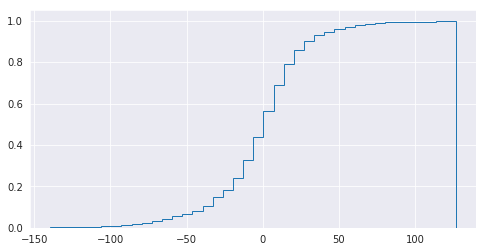

In [136]:
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(df['RETURNS'],40, density=True,histtype='step',cumulative = True)
plt.show()